In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
Datos = pd.read_csv('heart_cleveland_upload.csv')

In [4]:
Datos.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [5]:
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

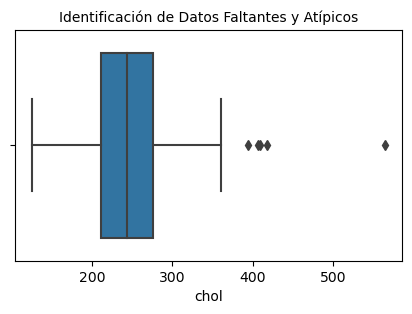

In [6]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

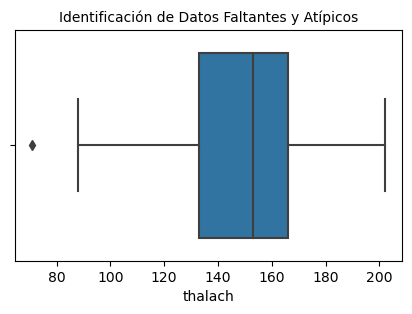

In [7]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=Datos['thalach'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

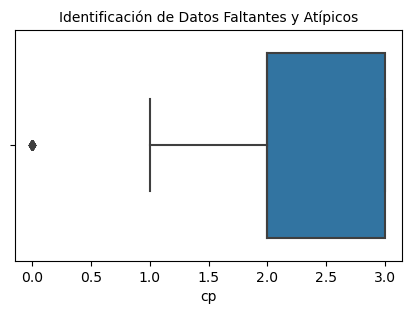

In [8]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=Datos['cp'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [9]:
print("Cantidad de Registros con cero en sex: ",Datos['sex'].isin([0]).sum())
print("Cantidad de Registros con cero en cp: ",Datos['cp'].isin([0]).sum())
print("Cantidad de Registros con cero en trestbps: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en chol: ",Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en fbs: ",Datos['fbs'].isin([0]).sum())

Cantidad de Registros con cero en sex:  96
Cantidad de Registros con cero en cp:  23
Cantidad de Registros con cero en trestbps:  0
Cantidad de Registros con cero en chol:  0
Cantidad de Registros con cero en fbs:  254


In [10]:
Datos['sex']=Datos['sex'].replace(0,Datos['sex'].mean())
Datos['cp']=Datos['cp'].replace(0,Datos['cp'].mean())
Datos['trestbps']=Datos['trestbps'].replace(0,Datos['trestbps'].mean())
Datos['chol']=Datos['chol'].replace(0,Datos['chol'].mean())
Datos['fbs']=Datos['fbs'].replace(0,Datos['fbs'].mean())

In [11]:
print("Cantidad de Registros con cero en sex: ",Datos['sex'].isin([0]).sum())
print("Cantidad de Registros con cero en cp: ",Datos['cp'].isin([0]).sum())
print("Cantidad de Registros con cero en trestbps: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en chol: ",Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en fbs: ",Datos['fbs'].isin([0]).sum())

Cantidad de Registros con cero en sex:  0
Cantidad de Registros con cero en cp:  0
Cantidad de Registros con cero en trestbps:  0
Cantidad de Registros con cero en chol:  0
Cantidad de Registros con cero en fbs:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

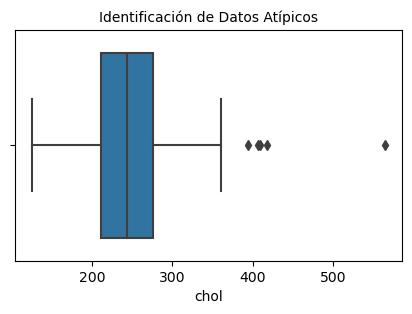

In [12]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [13]:
nivel_minimo=20
nivel_maximo=800
Total_Atipicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [14]:
Datos=Datos[(Datos['chol']<nivel_maximo)&(Datos['chol']>nivel_minimo)]

In [15]:
Total_Atipicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [16]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    float64
 2   cp         297 non-null    float64
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    float64
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 32.6 KB


In [17]:
Datos['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

In [18]:
X = Datos.drop('condition',axis=1) 
Y = Datos['condition'] 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [19]:
print (X_train)

     age       sex   cp  trestbps  chol       fbs  restecg  thalach  exang  \
234   56  0.676768  3.0       200   288  1.000000        2      133      1   
82    66  0.676768  2.0       146   278  0.144781        2      152      0   
36    56  1.000000  1.0       120   240  0.144781        0      169      0   
237   56  1.000000  3.0       132   184  0.144781        2      105      1   
133   47  1.000000  2.0       108   243  0.144781        0      152      0   
..   ...       ...  ...       ...   ...       ...      ...      ...    ...   
291   40  1.000000  3.0       110   167  0.144781        2      114      1   
195   61  0.676768  3.0       130   330  0.144781        2      169      0   
170   65  0.676768  3.0       150   225  0.144781        2      114      0   
135   46  0.676768  2.0       142   177  0.144781        2      160      1   
293   39  1.000000  3.0       118   219  0.144781        0      140      0   

     oldpeak  slope  ca  thal  
234      4.0      2   2     2  

In [20]:
print (X_test)

     age       sex   cp  trestbps  chol       fbs  restecg  thalach  exang  \
185   62  0.676768  3.0       140   268  0.144781        2      160      0   
157   70  1.000000  3.0       145   174  0.144781        0      125      1   
110   54  0.676768  2.0       135   304  1.000000        0      170      0   
39    56  1.000000  1.0       130   221  0.144781        2      163      0   
198   60  1.000000  3.0       130   206  0.144781        2      132      1   
..   ...       ...  ...       ...   ...       ...      ...      ...    ...   
278   45  1.000000  3.0       115   260  0.144781        2      185      0   
163   67  1.000000  3.0       100   299  0.144781        2      125      1   
137   44  0.676768  2.0       108   141  0.144781        0      175      0   
33    57  0.676768  1.0       130   236  0.144781        2      174      0   
246   54  1.000000  3.0       110   239  0.144781        0      126      1   

     oldpeak  slope  ca  thal  
185      3.6      2   2     0  

In [21]:
modelo_regresion = LogisticRegression(solver = "liblinear") 
modelo_regresion.fit (X_train , Y_train)   
Prediccion = modelo_regresion.predict(X_test)

In [22]:
X_test.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
185,62,0.676768,3.000000,140,268,0.144781,2,160,0,3.6,2,2,0
157,70,1.000000,3.000000,145,174,0.144781,0,125,1,2.6,2,0,2
110,54,0.676768,2.000000,135,304,1.000000,0,170,0,0.0,0,0,0
39,56,1.000000,1.000000,130,221,0.144781,2,163,0,0.0,0,0,2
198,60,1.000000,3.000000,130,206,0.144781,2,132,1,2.4,1,2,2
7,61,1.000000,2.158249,134,234,0.144781,0,145,0,2.6,1,2,0
202,60,1.000000,3.000000,140,293,0.144781,2,170,0,1.2,1,2,2
285,43,1.000000,3.000000,150,247,0.144781,0,171,0,1.5,0,0,0
272,46,0.676768,3.000000,138,243,0.144781,2,152,1,0.0,1,0,0
111,54,1.000000,2.000000,150,232,0.144781,2,165,0,1.6,0,0,2


In [23]:
print (Prediccion)

[1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 1]


In [24]:
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        40
           1       0.91      0.86      0.88        35

    accuracy                           0.89        75
   macro avg       0.90      0.89      0.89        75
weighted avg       0.89      0.89      0.89        75



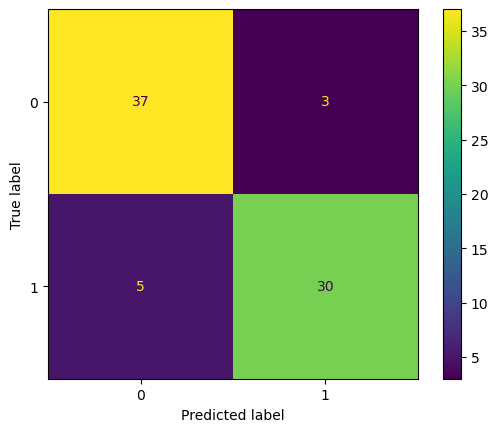

In [25]:
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

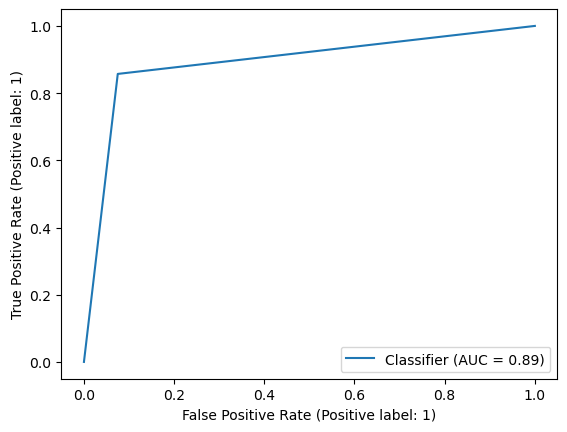

In [26]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()